In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import datetime

In [2]:
import warnings 
warnings.filterwarnings('ignore')

### Gather


Read-in WeRateDogs Twitter archive file.

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
consumer_key = #
consumer_secret = #
access_token = #
access_secret = #

auth = tweepy.OAuthHandler(#, #)
auth.set_access_token(#, #)

api = tweepy.API(auth, wait_on_rate_limit=True)

Download tweet image predictions file according to neural network from Udacity's server.

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [6]:
with open(url.split('/')[-1], mode = 'wb') as file: 
    file.write(r.content)

In [7]:
img_predictions = pd.read_csv('image-predictions.tsv', sep ="\t") 

Using tweet IDs in the WeRateDogs Twitter archive, queried Twitter API for each tweet's JSON data using Python's Tweepy library.
Stored each tweet's entire set of JSON data in file called tweet_json.txt file.

In [7]:
errors = []  
tweet_ids = twitter_archive.tweet_id.values 
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            errors.append(tweet_id)
            pass

In [11]:
print (errors) 

[888202515573088257, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 845459076796616705, 842892208864923648, 837012587749474308, 827228250799742977, 812747805718642688, 802247111496568832, 775096608509886464, 770743923962707968, 754011816964026368, 680055455951884288]


Each tweet's JSON data should be writtent to its own line. Then read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.

In [8]:
extracted_tweet_data = [] 
with open('tweet_json.txt') as tweet_json_file:  
    for line in tweet_json_file: 
        json_data = json.loads(line)
        tweet_id = json_data['id']
        retweet_count = json_data['retweet_count']
        favorite_count = json_data['favorite_count']
        extracted_tweet_data.append({'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count),
                        'tweet_id': tweet_id})
        

In [9]:
extracted_data = pd.DataFrame(extracted_tweet_data, columns = ['tweet_id', 'retweet_count', 'favorite_count']) 

#referenced Udacity's Supporting Material twitter_api.py file     
#https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy

### Assess

In [10]:
#pd.set_option('display.max_colwidth', -1)
#https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe
#pd.reset_option('^display.', silent=True)
#https://stackoverflow.com/questions/26246864/restoring-the-default-display-context-in-pandas

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
twitter_archive.shape

(2356, 17)

In [16]:
twitter_archive.duplicated().sum()

0

In [17]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Penny              10
Tucker             10
Lola               10
Bo                  9
Winston             9
the                 8
Sadie               8
an                  7
Bailey              7
Daisy               7
Buddy               7
Toby                7
Stanley             6
Scout               6
Jax                 6
Dave                6
Jack                6
Milo                6
Rusty               6
Koda                6
Oscar               6
Leo                 6
Bella               6
George              5
                 ... 
Gustaf              1
Mimosa              1
Ridley              1
Kaiya               1
Ebby                1
Deacon              1
Superpup            1
Grizz               1
Asher               1
Willem              1
Jaspers             1
Al                  1
Rodman              1
Adele               1
Rupert    

In [22]:
twitter_archive.tail(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,None,None,None
2257,667728196545200128,NaN,NaN,2015-11-20 15:36:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667728196...,11,10,Olive,None,None,None,None
2258,667724302356258817,NaN,NaN,2015-11-20 15:20:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667724302...,7,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2262,667546741521195010,NaN,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,None,None,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,None,None,None
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,None,None,None
2265,667534815156183040,NaN,NaN,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,None,None,None


In [23]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
img_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [26]:
img_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
img_predictions.shape

(2075, 12)

In [28]:
img_predictions.duplicated().sum()

0

In [29]:
img_predictions[img_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [31]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
img_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West_Highland_white_terrier,0.119188,True,quill,0.104014,False,Maltese_dog,0.093944,True
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True
580,678767140346941444,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1,harp,0.821120,False,window_screen,0.025121,False,mosquito_net,0.016716,False
1583,796865951799083009,https://pbs.twimg.com/media/Cw8JWZ2UsAAJOZ6.jpg,1,Cardigan,0.839129,True,Boston_bull,0.080699,True,Pembroke,0.034505,True


In [33]:
extracted_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8249,37826
1,892177421306343426,6093,32502
2,891815181378084864,4034,24461
3,891689557279858688,8394,41174
4,891327558926688256,9101,39352


In [34]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [35]:
extracted_data.sample(5)

,tweet_id,retweet_count,favorite_count
1306,706291001778950144,494,1772
1823,675888385639251968,1003,2436
2240,667728196545200128,152,379
1397,698907974262222848,660,2644
1285,707629649552134146,930,2682


In [36]:
extracted_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8249,37826
1,892177421306343426,6093,32502
2,891815181378084864,4034,24461
3,891689557279858688,8394,41174
4,891327558926688256,9101,39352
5,891087950875897856,3017,19778
6,890971913173991426,1996,11569
7,890729181411237888,18322,63805
8,890609185150312448,4149,27194
9,890240255349198849,7163,31168


In [37]:
extracted_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.421620e+17,2907.100043,7907.793929
std,6.828729e+16,4900.999411,12255.624883
min,6.660209e+17,0.000000,0.000000
25%,6.783378e+17,584.000000,1367.500000
50%,7.186133e+17,1356.000000,3443.000000
75%,7.986907e+17,3388.000000,9691.000000
max,8.924206e+17,83070.000000,163344.000000


In [38]:
extracted_data[extracted_data['retweet_count'] == 0]

,tweet_id,retweet_count,favorite_count
282,838085839343206401,0,146


In [39]:
extracted_data[extracted_data['retweet_count'] == 83070]

,tweet_id,retweet_count,favorite_count
1023,744234799360020481,83070,163344


#### Quality

##### twitter archive table
-  Time is object not datetime, incorrect datatype
-  Change dog types to category
-  Replace missing values for dog types with NaN, this will be necessary for merging columns
-  There are retweets and remove in-reply to status id 
-  Denominator's are not 10
-  Various numerator values, some are decimals not extracted properly
-  Largest numerator should be 14
-  Names not properly extracted
-  Erronous datatypes


##### image predictions
-  Remove underscores
-  Change to uppercase 
-  Erronous datatypes


#### Tidiness
-  Consolidate four columns into one for dog type
-  Twitter archive table, image predictions, extracted data are separate tables
-  Not all tweet id's are present accross the dataset, this will be resolved by 'inner' join on tweet id

   

### Clean

In [40]:
twitter_archive_clean = twitter_archive.copy()

In [41]:
img_predictions_clean = img_predictions.copy()

In [42]:
extracted_data_clean = extracted_data.copy()

#### Define

Missing value dog types need to be replaced with NaN

 #### Code

In [43]:
twitter_archive_clean['doggo'].replace('None',np.nan,inplace=True)
twitter_archive_clean['floofer'].replace('None',np.nan,inplace=True)
twitter_archive_clean['pupper'].replace('None',np.nan,inplace=True)
twitter_archive_clean['puppo'].replace('None',np.nan,inplace=True)

#### Check

In [44]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2018,672139350159835138,NaN,NaN,2015-12-02 19:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672139350...,12,10,None,NaN,NaN,NaN,NaN
253,844704788403113984,NaN,NaN,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,NaN,NaN,NaN,NaN
1450,695816827381944320,NaN,NaN,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a dog enjoying a sunset. 11/10 would tr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695816827...,11,10,None,NaN,NaN,NaN,NaN
1092,737322739594330112,NaN,NaN,2016-05-30 16:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's not injured or anythi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737322739...,9,10,Lily,NaN,NaN,NaN,NaN
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Other pupper asked not to have his identity sh...,NaN,NaN,NaN,NaN,12,10,None,NaN,NaN,pupper,NaN


#### Define

Remove retweets and in-reply to status id

#### Code

In [45]:
twitter_archive_clean = twitter_archive_clean[~((twitter_archive_clean.in_reply_to_status_id.notnull()) | twitter_archive_clean.retweeted_status_user_id.notnull())]

#### Check

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: float64(4), int64(3), object(10)
memory

#### Define

Change numerator and denominator to float

#### Code

In [47]:
twitter_archive_clean.rating_numerator=twitter_archive_clean.rating_numerator.astype(float) 

In [48]:
twitter_archive_clean.rating_denominator=twitter_archive_clean.rating_denominator.astype(float) 

#### Check

In [191]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: float64(6), int64(1), object(10)
me

#### Define

Change denominators to 10

In [49]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,None,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4.0,20.0,None,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,NaN,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,None,NaN,NaN,NaN,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,None,NaN,NaN,NaN,NaN
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45.0,50.0,None,NaN,NaN,NaN,NaN


From visual inspection, it was possible to see that denominators are greater than 10 because the rating is given for multiple dogs or because there is another (non-rating) fraction in the tweet text field and the data is incorrectly extracted. 

In [50]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.rating_denominator == 10] #drop all other values

#### Check

In [51]:
twitter_archive_clean[twitter_archive_clean.rating_denominator!=10]   

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

Change numerators to decimals, which are incorrectly extracted

#### Code

In [52]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"\d+\.\d+\/\d+")]
    
    #https://stackoverflow.com/questions/4703390/how-to-extract-a-floating-number-from-a-string
    #https://stackoverflow.com/questions/15325182/how-to-filter-rows-in-pandas-by-regex

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,NaN,NaN,pupper,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,NaN,NaN,NaN,NaN


In [53]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.replace(5.0, 13.5)

In [54]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.replace(75.0, 9.75)

In [55]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.replace(27.0, 11.27)

In [56]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.replace(26.0,11.26)

#### Check

In [57]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] 

45    13.5
Name: rating_numerator, dtype: float64

In [58]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] 

695    9.75
Name: rating_numerator, dtype: float64

In [59]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] 

763    11.27
Name: rating_numerator, dtype: float64

In [60]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator']

1712    11.26
Name: rating_numerator, dtype: float64

#### Define

Drop all numerators greater than 14.

#### Code

In [61]:
twitter_archive_clean=twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator>14].index)

#### Check

In [62]:
twitter_archive_clean.rating_numerator.value_counts()
#https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

12.00    486
10.00    436
11.00    413
13.00    287
9.00     152
8.00      98
7.00      51
14.00     38
13.50     34
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
0.00       1
11.27      1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

#### Define

Replace incorrectly extracted names, that start with lowercase letters with "None"

#### Code

In [64]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace(r'^[a-z]+$',"None")
#Non-names did not start with an upper case letter, find all lowercase and replace
#https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none

#### Check

In [65]:
twitter_archive_clean.name.value_counts()

None              692
Charlie            11
Lucy               11
Cooper             10
Oliver             10
Tucker              9
Penny               9
Sadie               8
Lola                8
Winston             8
Daisy               7
Toby                7
Bailey              6
Jax                 6
Stanley             6
Bella               6
Bo                  6
Koda                6
Oscar               6
Scout               5
Rusty               5
Milo                5
Bentley             5
Dave                5
Chester             5
Buddy               5
Louis               5
Leo                 5
Sophie              4
Winnie              4
                 ... 
Striker             1
Ivar                1
Rubio               1
Michelangelope      1
Rodman              1
Adele               1
Emmie               1
Peanut              1
Rhino               1
Brandy              1
Zoe                 1
Creg                1
Snicku              1
Sojourner           1
Bruiser   

#### Define

Capitalize dog breeds

#### Code

In [66]:
img_predictions_clean.p1=img_predictions_clean.p1.str.capitalize()

#### Check

In [67]:
img_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Remove underscores 

#### Code

In [68]:
img_predictions_clean.p1=img_predictions_clean.p1.str.replace("_"," ")

#### Check

In [69]:
img_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Change additional erronous datatypes

#### Code

In [70]:
twitter_archive_clean.name=twitter_archive_clean.name.astype('category') 
twitter_archive_clean.doggo=twitter_archive_clean.doggo.astype('category') 
twitter_archive_clean.floofer=twitter_archive_clean.floofer.astype('category') 
twitter_archive_clean.pupper=twitter_archive_clean.pupper.astype('category') 
twitter_archive_clean.puppo=twitter_archive_clean.puppo.astype('category') 

In [71]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [72]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2078 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2078 non-null datetime64[ns]
source                        2078 non-null object
text                          2078 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2078 non-null float64
rating_denominator            2078 non-null float64
name                          2078 non-null category
doggo                         83 non-null category
floofer                       10 non-null category
pupper                        230 non-null category
puppo                         24 non-null category
dtypes: category(5), date

### Tidiness

#### Define

Combine multiple dog type columns into one

#### Code

In [73]:
twitter_archive_clean=twitter_archive_clean.assign(dog_type=twitter_archive_clean.iloc[:,13:17].apply(lambda x: ','.join(x.dropna()), axis=1))

#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans
                                                                         

#### Check

In [74]:
    twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2078 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2078 non-null datetime64[ns]
source                        2078 non-null object
text                          2078 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2078 non-null float64
rating_denominator            2078 non-null float64
name                          2078 non-null category
doggo                         83 non-null category
floofer                       10 non-null category
pupper                        230 non-null category
puppo                         24 non-null category
dog_type                 

In [75]:
    twitter_archive_clean.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,NaN,NaN,NaN,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,NaN,NaN,NaN,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,NaN,NaN,NaN,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,NaN,NaN,NaN,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,NaN,NaN,NaN,doggo


In [76]:
twitter_archive_clean.dog_type=twitter_archive_clean.dog_type.replace("",np.NaN)

In [77]:
twitter_archive_clean.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,NaN,NaN,NaN,doggo


#### Define

Merge relevant columns into one data set

#### Code 

In [78]:
from functools import reduce

In [79]:
data_frames=[twitter_archive_clean,img_predictions_clean,extracted_data_clean]

In [80]:
df_merged=reduce(lambda left,right:pd.merge(left,right,on=['tweet_id'],how='inner'),data_frames)
#https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes/44338256

In [81]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 31 columns):
tweet_id                      1949 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1949 non-null datetime64[ns]
source                        1949 non-null object
text                          1949 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1949 non-null object
rating_numerator              1949 non-null float64
rating_denominator            1949 non-null float64
name                          1949 non-null category
doggo                         73 non-null category
floofer                       8 non-null category
pupper                        209 non-null category
puppo                         23 non-null category
dog_type                  

In [82]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8249,37826
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6093,32502
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4034,24461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8394,41174
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9101,39352


In [83]:
#Drop columns
df_merged.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','doggo','floofer','pupper','puppo','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [84]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 16 columns):
tweet_id              1949 non-null int64
timestamp             1949 non-null datetime64[ns]
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null float64
rating_denominator    1949 non-null float64
name                  1949 non-null category
dog_type              303 non-null object
jpg_url               1949 non-null object
img_num               1949 non-null int64
p1                    1949 non-null object
p1_conf               1949 non-null float64
p1_dog                1949 non-null bool
retweet_count         1949 non-null int64
favorite_count        1949 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 281.4+ KB


In [85]:
#Rename columns
df_merged.columns = ['TweetID','Timestamp','Source','Text','ExpandedURL','RatingNumerator','RatingDenominator','Name','DogType','ImgURL','ImgNumber','DogBreed','Confidence','T/F','RetweetCount','FavoriteCount']

#### Check

In [86]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 16 columns):
TweetID              1949 non-null int64
Timestamp            1949 non-null datetime64[ns]
Source               1949 non-null object
Text                 1949 non-null object
ExpandedURL          1949 non-null object
RatingNumerator      1949 non-null float64
RatingDenominator    1949 non-null float64
Name                 1949 non-null category
DogType              303 non-null object
ImgURL               1949 non-null object
ImgNumber            1949 non-null int64
DogBreed             1949 non-null object
Confidence           1949 non-null float64
T/F                  1949 non-null bool
RetweetCount         1949 non-null int64
FavoriteCount        1949 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 281.4+ KB


#### Define

Fix additional datatypes after merge

#### Code

In [87]:
df_merged.Name=df_merged.Name.astype('category') 
df_merged.DogType=df_merged.DogType.astype('category')
df_merged.DogBreed=df_merged.DogBreed.astype('category') 

#### Check

In [88]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 16 columns):
TweetID              1949 non-null int64
Timestamp            1949 non-null datetime64[ns]
Source               1949 non-null object
Text                 1949 non-null object
ExpandedURL          1949 non-null object
RatingNumerator      1949 non-null float64
RatingDenominator    1949 non-null float64
Name                 1949 non-null category
DogType              303 non-null category
ImgURL               1949 non-null object
ImgNumber            1949 non-null int64
DogBreed             1949 non-null category
Confidence           1949 non-null float64
T/F                  1949 non-null bool
RetweetCount         1949 non-null int64
FavoriteCount        1949 non-null int64
dtypes: bool(1), category(3), datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 269.9+ KB


##### Save to .csv

In [89]:
df_merged.to_csv('twitter_archive_master.csv',index=False)

### Visualization and Analysis

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')  

In [92]:
sns.set_style('dark')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

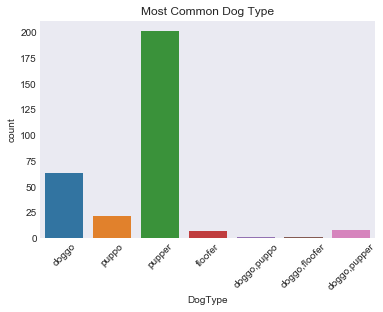

In [93]:
count_plot = sns.countplot(x='DogType', data=twitter_archive_master).set_title('Most Common Dog Type')
plt.xticks(rotation=45)


In [94]:
twitter_archive_master.DogType.value_counts()

pupper           201
doggo             63
puppo             22
doggo,pupper       8
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: DogType, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

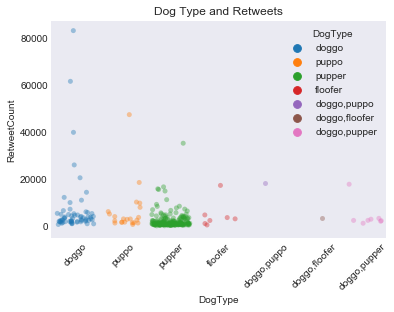

In [95]:
sns.stripplot(x='DogType',y='RetweetCount', hue='DogType',data=twitter_archive_master, jitter=.4, alpha=.4).set_title('Dog Type and Retweets')
plt.xticks(rotation=45)


In [96]:
top_RetweetCount=twitter_archive_master[twitter_archive_master.RetweetCount> np.percentile(twitter_archive_master.RetweetCount,75)]

In [97]:
top_RetweetCount.describe()

,TweetID,RatingNumerator,RatingDenominator,ImgNumber,Confidence,RetweetCount,FavoriteCount
count,4.870000e+02,487.00000,487.0,487.000000,487.000000,487.000000,487.000000
mean,8.044684e+17,11.99230,10.0,1.371663,0.638878,7350.301848,23685.823409
std,6.396429e+16,1.51792,0.0,0.761373,0.264993,7601.832607,18000.074206
min,6.661041e+17,0.00000,10.0,1.000000,0.063152,3030.000000,5603.000000
25%,7.653089e+17,11.00000,10.0,1.000000,0.414326,3738.500000,13143.000000
50%,8.174239e+17,12.00000,10.0,1.000000,0.664487,4977.000000,19591.000000
75%,8.581090e+17,13.00000,10.0,1.000000,0.892501,7769.000000,27355.000000
max,8.924206e+17,14.00000,10.0,4.000000,0.999984,83070.000000,163344.000000


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

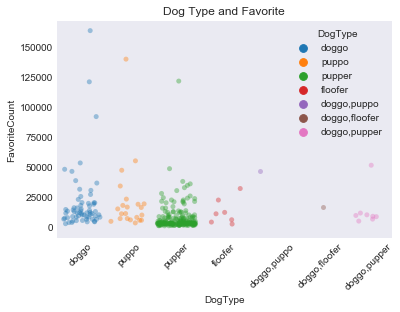

In [98]:
sns.stripplot(x='DogType',y='FavoriteCount', hue='DogType',data=twitter_archive_master, jitter=.4, alpha=.4).set_title('Dog Type and Favorite')
plt.xticks(rotation=45)

In [99]:
top_FavoriteCount=twitter_archive_master[twitter_archive_master.FavoriteCount> np.percentile(twitter_archive_master.FavoriteCount,75)]

In [100]:
top_FavoriteCount.describe()

,TweetID,RatingNumerator,RatingDenominator,ImgNumber,Confidence,RetweetCount,FavoriteCount
count,4.870000e+02,487.000000,487.0,487.000000,487.000000,487.000000,487.000000
mean,8.189398e+17,12.151437,10.0,1.347023,0.630033,7188.201232,24327.956879
std,5.546516e+16,1.320458,0.0,0.745843,0.260915,7690.272152,17551.768372
min,6.661041e+17,0.000000,10.0,1.000000,0.063152,1039.000000,10922.000000
25%,7.892196e+17,12.000000,10.0,1.000000,0.405692,3556.500000,14037.500000
50%,8.298614e+17,12.000000,10.0,1.000000,0.652280,4967.000000,19809.000000
75%,8.607648e+17,13.000000,10.0,1.000000,0.875555,7769.000000,27355.000000
max,8.924206e+17,14.000000,10.0,4.000000,0.999833,83070.000000,163344.000000


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

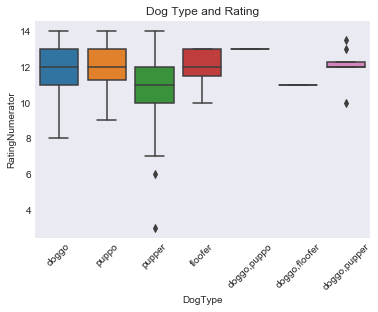

In [101]:
#Highest rated dog types
sns.boxplot(x='DogType',y='RatingNumerator', data=twitter_archive_master).set_title('Dog Type and Rating')
plt.xticks(rotation=45)


In [102]:
twitter_archive_master.groupby('DogType').RatingNumerator.describe()

,count,mean,std,min,25%,50%,75%,max
DogType,,,,,,,,
doggo,63.0,11.888889,1.471351,8.0,11.00,12.0,13.00,14.0
"doggo,floofer",1.0,11.000000,NaN,11.0,11.00,11.0,11.00,11.0
"doggo,pupper",8.0,12.062500,1.015505,10.0,12.00,12.0,12.25,13.5
"doggo,puppo",1.0,13.000000,NaN,13.0,13.00,13.0,13.00,13.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.00,13.0
pupper,201.0,10.680448,1.701173,3.0,10.00,11.0,12.00,14.0
puppo,22.0,12.000000,1.309307,9.0,11.25,12.0,13.00,14.0


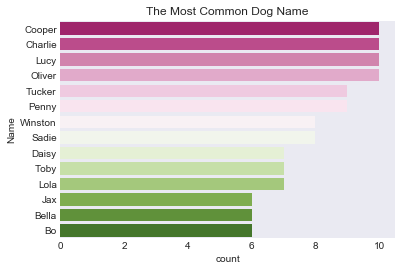

In [103]:

count_plot2 = sns.countplot(y='Name', data=twitter_archive_master, palette="PiYG",order=pd.value_counts(twitter_archive_master['Name']).iloc[1:15].index).set_title('The Most Common Dog Name')
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

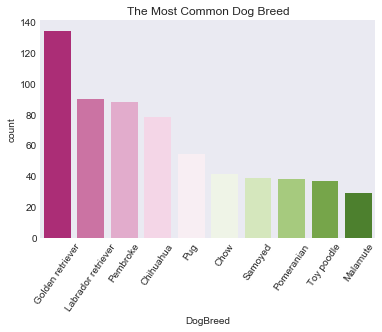

In [104]:
sns.countplot(x='DogBreed', data=twitter_archive_master, palette="PiYG",order=pd.value_counts(twitter_archive_master['DogBreed']).iloc[:10].index).set_title('The Most Common Dog Breed')
plt.xticks(rotation=55)